In [1]:
"""
Class Name    : CS6140 Machine Learning 
Session       : Fall 2023 (Seattle)
Author        : Team B - YiShuang Chen & Shiang Jin, Chin
Last Update   : 12/17/2023
Description   : Contains all required code to run EDA Analysis and Linear Regression
"""
# %% [markdown]
# Instruction for use: Download the train.csv file from https://www.kaggle.com/competitions/optiver-trading-at-the-close/data.
# Place it in a directory, pass the directory path to the read_csv function

###
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import glm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import time as time
from scipy.stats import pearsonr, spearmanr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# This datapath is for us, change it to your place
data_path = "D:/OneDrive/NEU/CS6140/optiver-trading-at-the-close"
data = pd.read_csv(f'{data_path}/train.csv')
data = data.dropna()

 This section plot some histogram

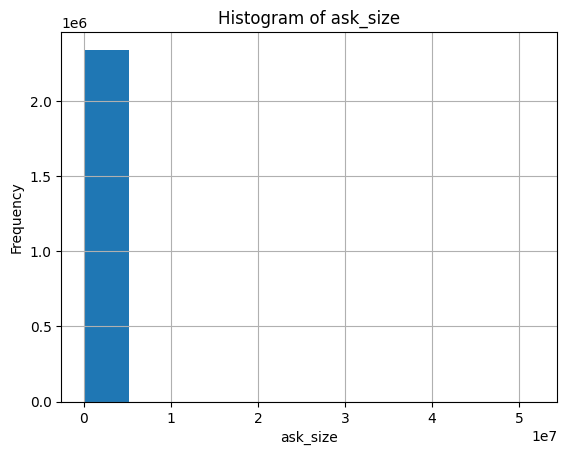

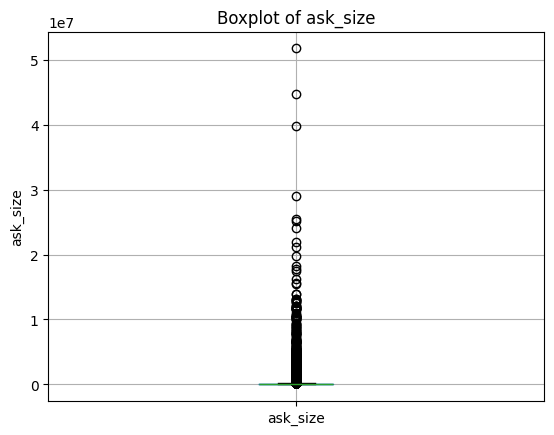

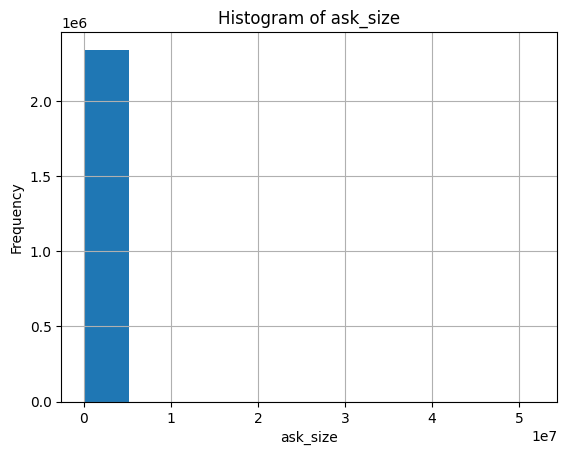

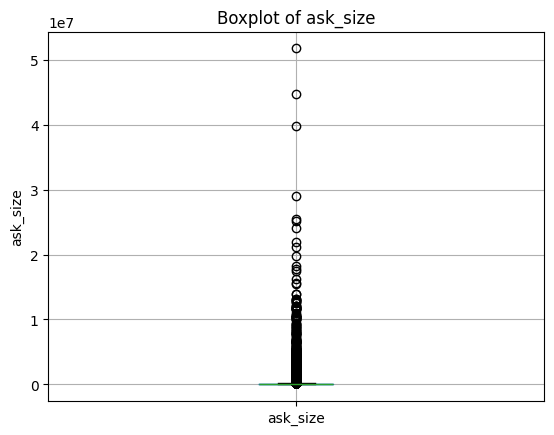

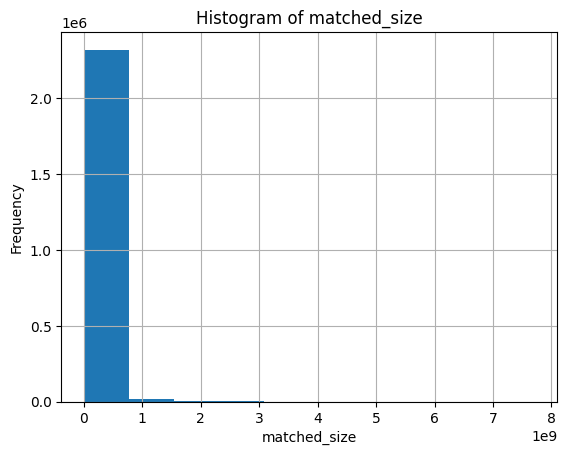

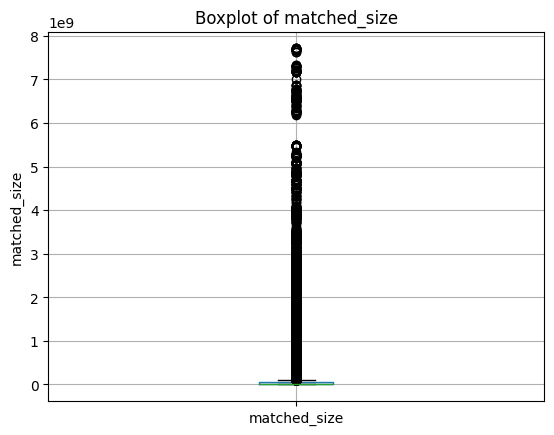

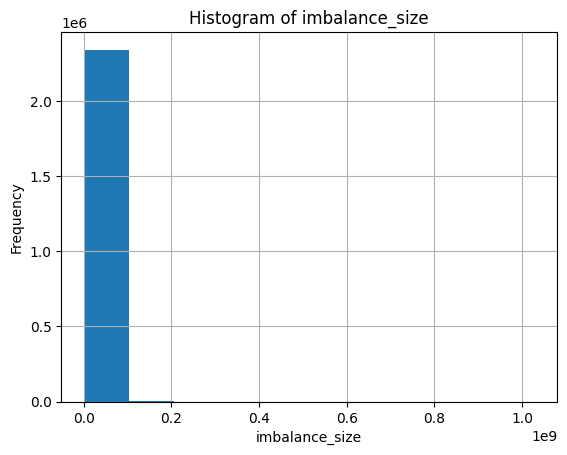

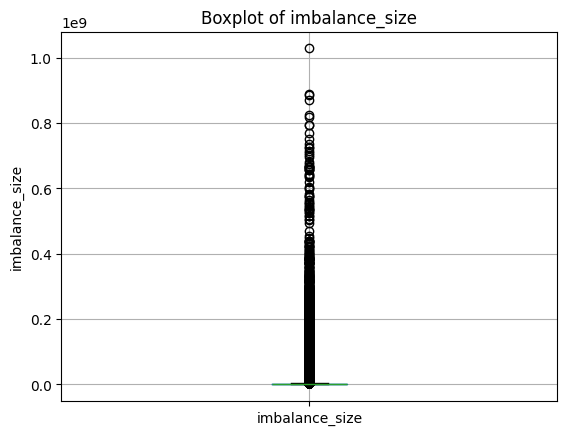

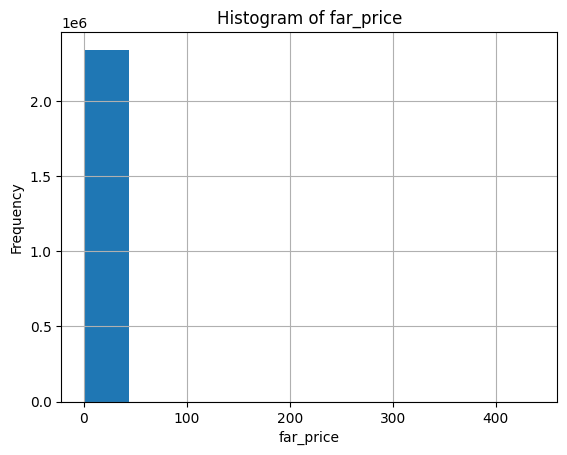

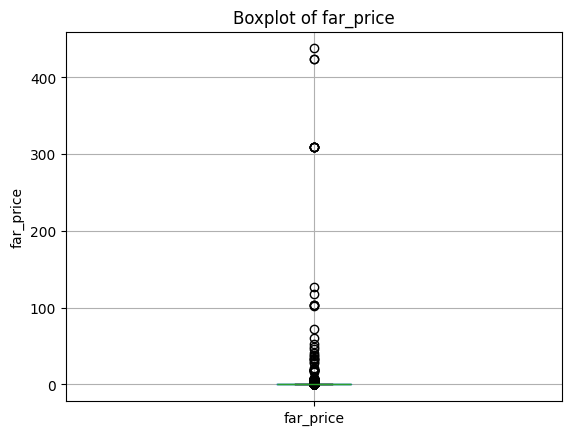

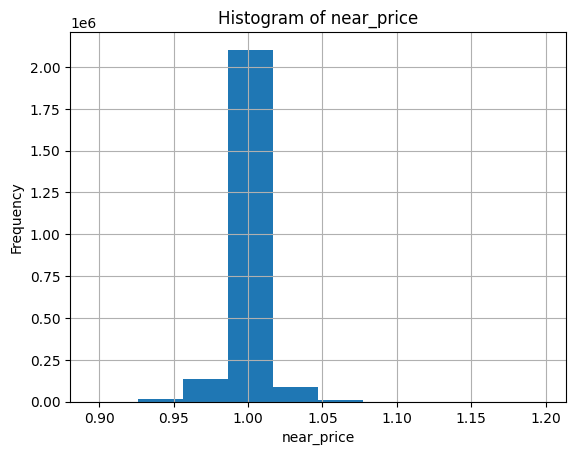

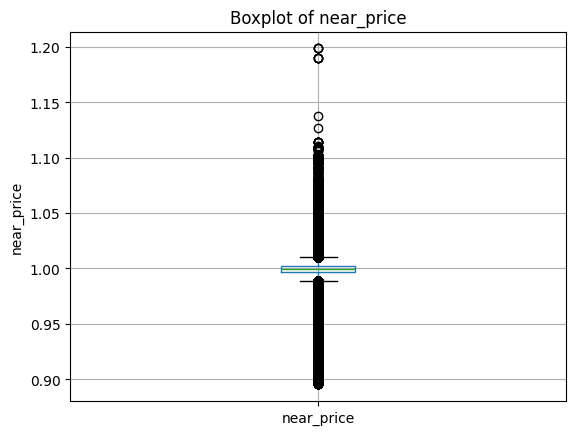

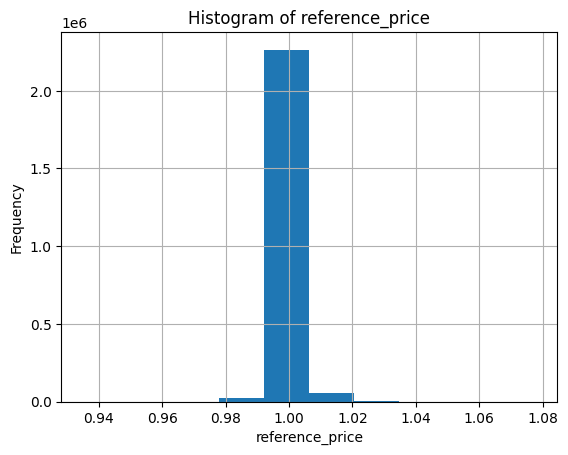

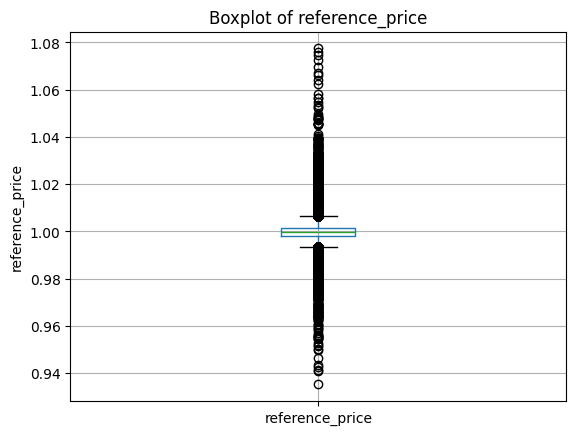

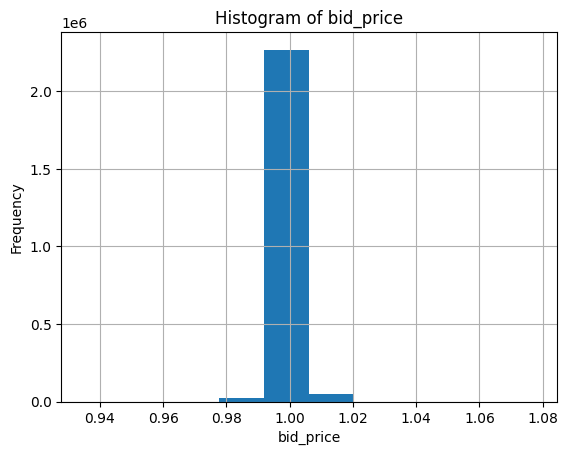

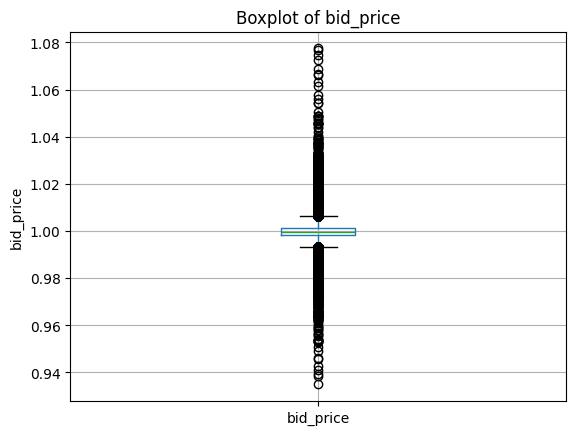

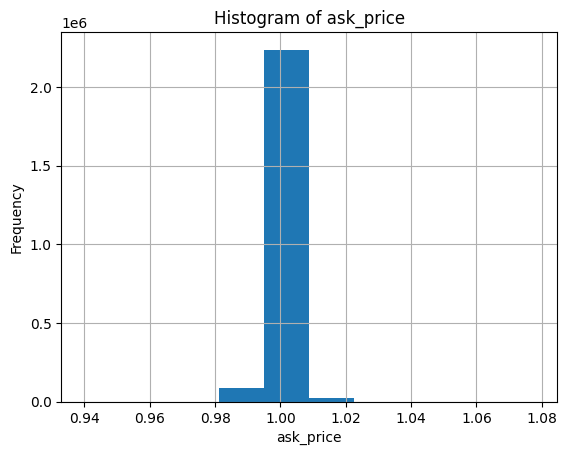

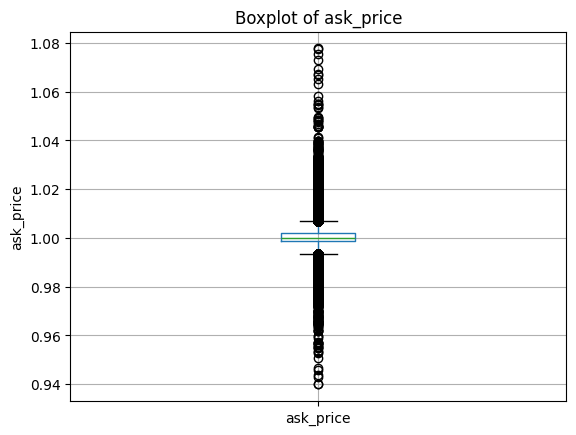

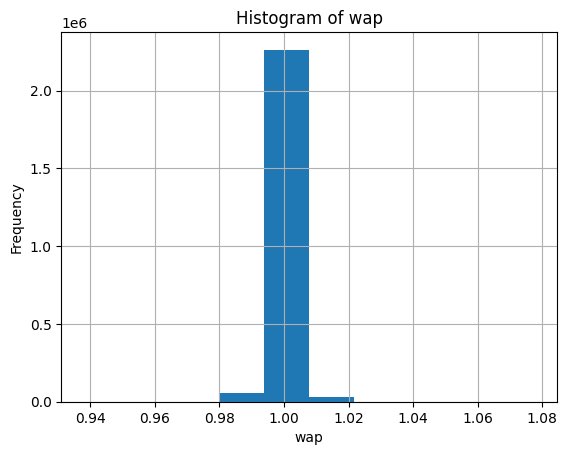

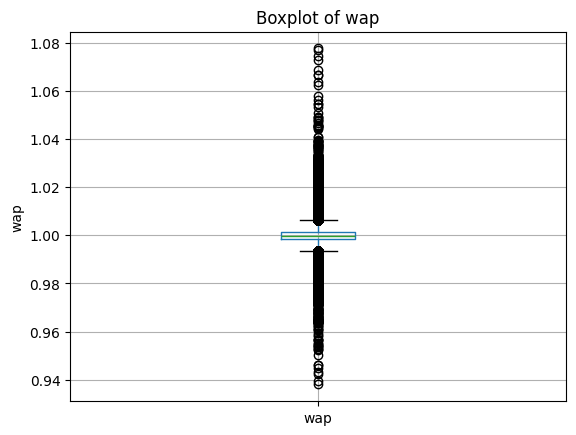

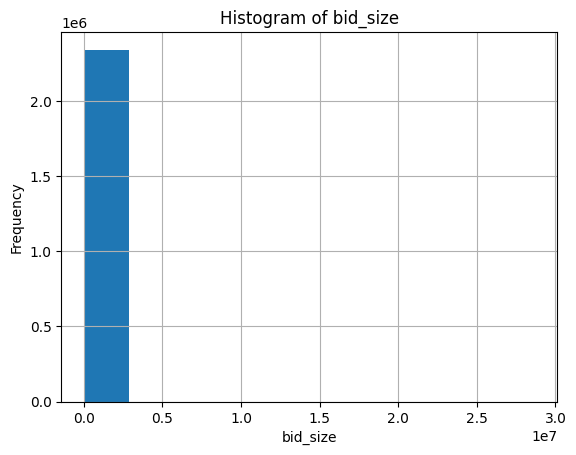

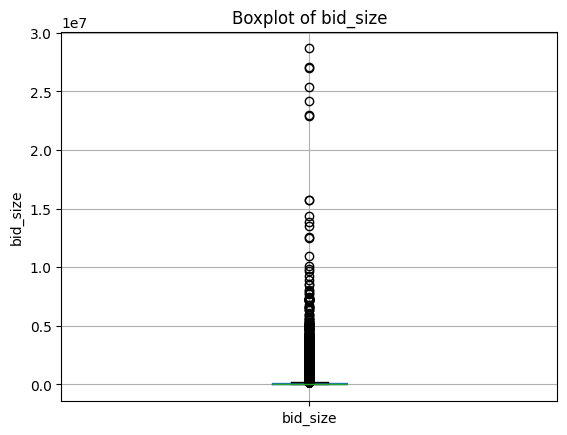

In [2]:
min_value = data['ask_size'].min()
max_value = data['ask_size'].max()


data['ask_size'].hist(range=(min_value, max_value))
plt.title('Histogram of ask_size')
plt.xlabel('ask_size')
plt.ylabel('Frequency')
plt.show()


data.boxplot(column=['ask_size'])
plt.title('Boxplot of ask_size')
plt.ylabel('ask_size')
plt.show()

variables = ['ask_size', 'matched_size', 'imbalance_size', 'far_price', 'near_price',
             'reference_price', 'bid_price', 'ask_price', 'wap', 'bid_size']


for var in variables:
    min_value = data[var].min()
    max_value = data[var].max()

    data[var].hist(range=(min_value, max_value))
    plt.title('Histogram of ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    data.boxplot(column=[var])
    plt.title('Boxplot of ' + var)
    plt.ylabel(var)
    plt.show()

 This section plot some violin plots

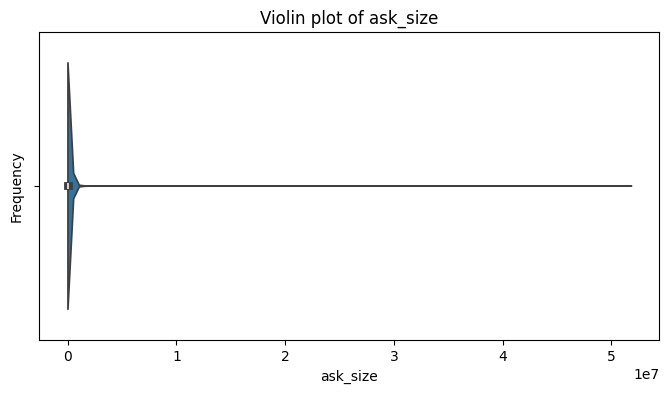

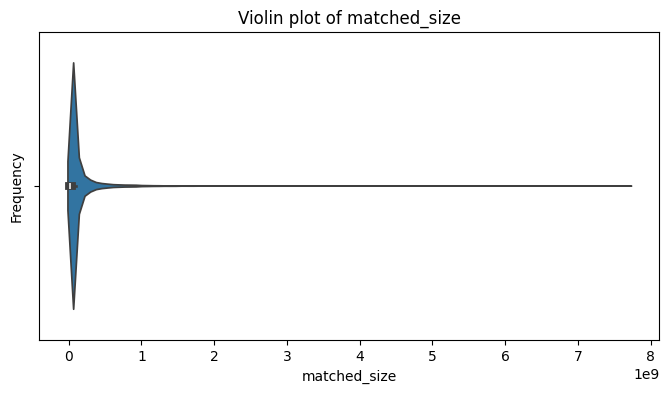

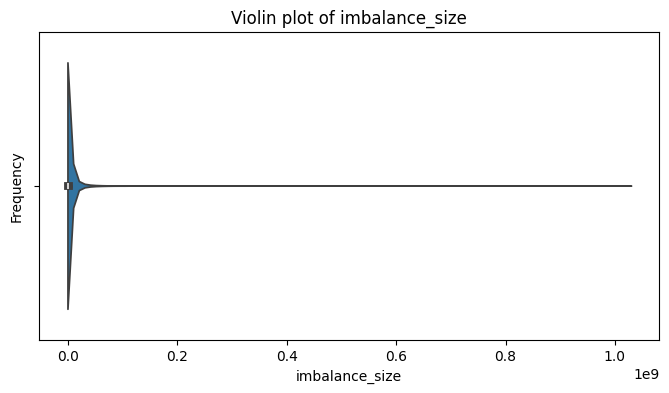

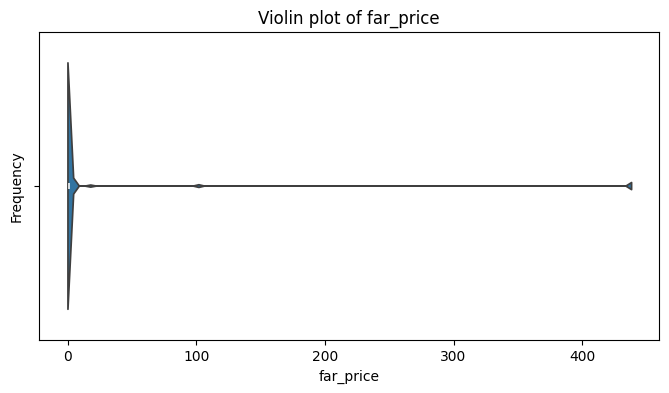

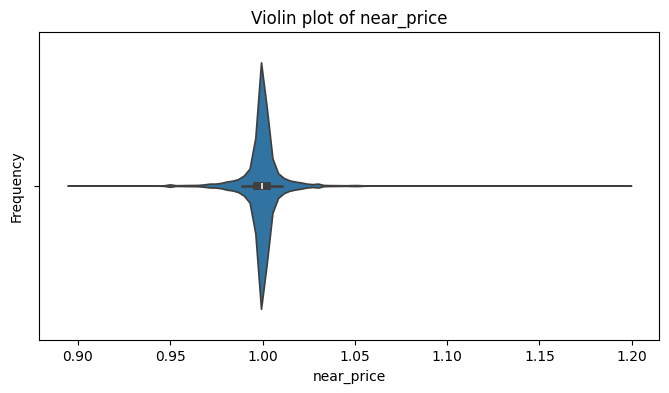

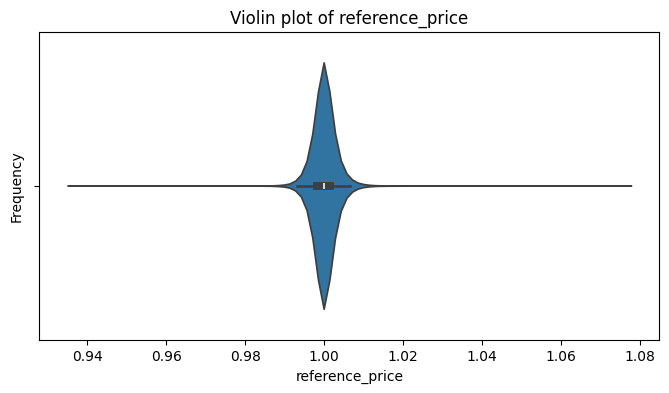

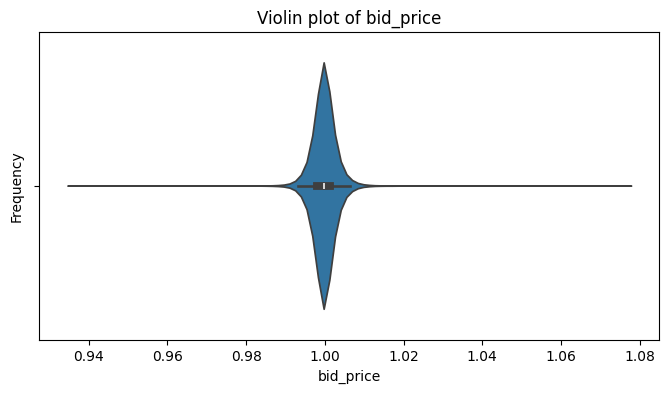

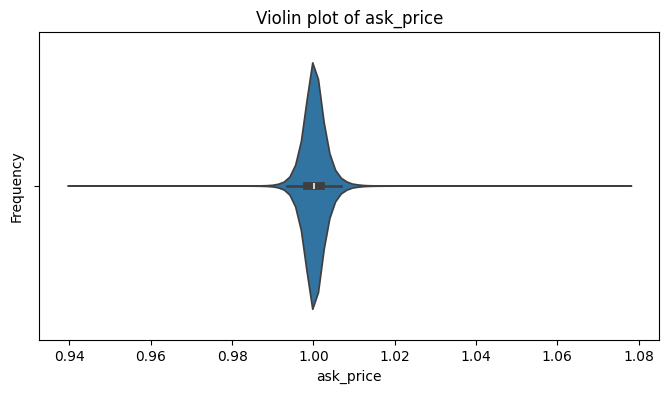

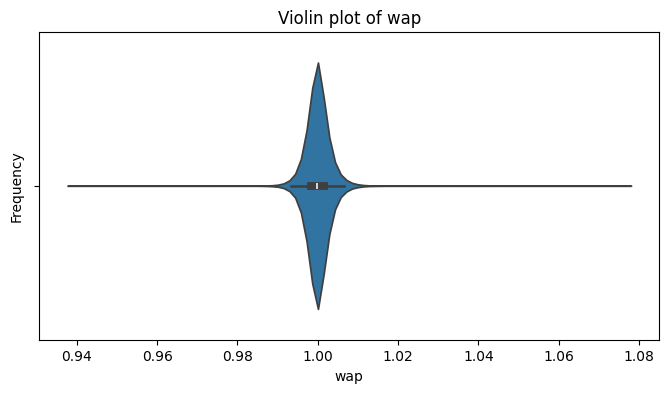

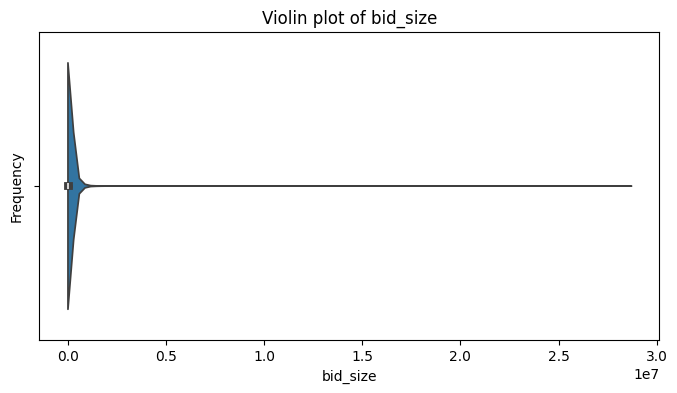

In [3]:
variables = ['ask_size', 'matched_size', 'imbalance_size', 'far_price', 'near_price',
             'reference_price', 'bid_price', 'ask_price', 'wap', 'bid_size']

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=data[var])
    plt.title('Violin plot of ' + var)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

 This section plot explore the target, range and distribution
 Load the dataset

Range of the target variable: 831.36023 (Min: -385.2898, Max: 446.07043)


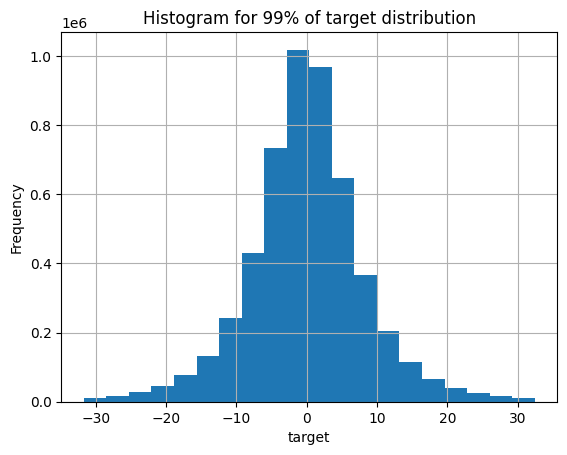

In [4]:
data = pd.read_csv(f'{data_path}/train.csv')
data.head()

# Assuming 'Close' is the target variable
target = data['target']

# Calculating the range of the target variable
range_min = target.min()
range_max = target.max()
target_range = range_max - range_min

print(
    f"Range of the target variable: {target_range} (Min: {range_min}, Max: {range_max})")

# Get the 0.5% quantile and 99.5% quantile, where 99% of data is enclosed
min_value = target.quantile(0.005)
max_value = target.quantile(0.995)

# 绘制直方图
target.hist(range=(min_value, max_value), bins=20)
plt.title('Histogram for 99% of target distribution')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.show()

 This section look at the overall datasets,
 Get the number of rows and columns

In [5]:
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


# Count unique stock_id
unique_stock_id_count = data['stock_id'].nunique()

# Count unique date_id
unique_date_id_count = data['date_id'].nunique()

# Count unique seconds_in_bucket
unique_seconds_in_bucket_count = data['seconds_in_bucket'].nunique()

print(f"Unique stock_id count: {unique_stock_id_count}")
print(f"Unique date_id count: {unique_date_id_count}")
print(f"Unique seconds_in_bucket count: {unique_seconds_in_bucket_count}")

print("after dropping all na value")
data = data.dropna()

rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


# Count unique stock_id
unique_stock_id_count = data['stock_id'].nunique()

# Count unique date_id
unique_date_id_count = data['date_id'].nunique()

# Count unique seconds_in_bucket
unique_seconds_in_bucket_count = data['seconds_in_bucket'].nunique()

print(f"Unique stock_id count: {unique_stock_id_count}")
print(f"Unique date_id count: {unique_date_id_count}")
print(f"Unique seconds_in_bucket count: {unique_seconds_in_bucket_count}")

Number of rows: 5237980
Number of columns: 17
Unique stock_id count: 200
Unique date_id count: 481
Unique seconds_in_bucket count: 55
after dropping all na value
Number of rows: 2343638
Number of columns: 17
Unique stock_id count: 200
Unique date_id count: 481
Unique seconds_in_bucket count: 25


 This section perform pearsonr and spearmanr correlation analysis

In [6]:
df = data

float_columns = df.select_dtypes(include=['float']).columns


def pearson_correlation(df, target_column, float_columns):
    correlations = {}
    for column in float_columns:
        if column != target_column:
            corr, _ = pearsonr(df[column], df[target_column])
            correlations[column] = corr
    return correlations


def spearman_correlation(df, target_column, float_columns):
    correlations = {}
    for column in float_columns:
        if column != target_column:
            corr, _ = spearmanr(df[column], df[target_column])
            correlations[column] = corr
    return correlations


pearson_results = pearson_correlation(df, 'target', float_columns)
spearman_results = spearman_correlation(df, 'target', float_columns)

print("pearson_correlation:", pearson_results)
print("spearman_correlation:", spearman_results)

sorted_pearson = sorted(pearson_results.items(),
                        key=lambda x: x[1], reverse=True)
sorted_spearman = sorted(spearman_results.items(),
                         key=lambda x: x[1], reverse=True)

print("Sorted Pearson Correlation:", sorted_pearson)
print("Sorted Spearman Correlation:", sorted_spearman)

pearson_correlation: {'imbalance_size': 0.0010597508079051626, 'reference_price': -0.04473762032423139, 'matched_size': 0.0006216808516380066, 'far_price': -0.0018037281170692639, 'near_price': -0.0021150354485942897, 'bid_price': -0.0477554218974983, 'bid_size': -0.0177396310923741, 'ask_price': -0.04838886498913461, 'ask_size': 0.012752139801387964, 'wap': -0.05619405194322403}
spearman_correlation: {'imbalance_size': 0.0010833034541324852, 'reference_price': -0.03203920862358735, 'matched_size': 0.0017232624948999048, 'far_price': -0.005374061289319049, 'near_price': -0.007609943577612968, 'bid_price': -0.03414298133949166, 'bid_size': -0.05963073825519519, 'ask_price': -0.03501851042029458, 'ask_size': 0.05748957483990446, 'wap': -0.042821047552866746}
Sorted Pearson Correlation: [('ask_size', 0.012752139801387964), ('imbalance_size', 0.0010597508079051626), ('matched_size', 0.0006216808516380066), ('far_price', -0.0018037281170692639), ('near_price', -0.0021150354485942897), ('bid

 We will do some ols analysis

In [7]:
data = pd.read_csv(f'{data_path}/train.csv')
data.info()

start = time.time()
# time_id & row_id has no meaning,
# stock_id is ignored as treating it as categorical take too long to run
# same to date_id
target_lr = ols(formula='target ~ C(stock_id) + seconds_in_bucket + imbalance_size + C(imbalance_buy_sell_flag) \
                + reference_price + matched_size + far_price + near_price + bid_price + bid_size \
                + ask_price + ask_size + wap', data=data)
target_lr_fit = target_lr.fit()
print("Regression Result for the target")
print(target_lr_fit.summary())
end = time.time()
print(f'The analysis took {(end - start):.1f} seconds')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB
Regression Result for the target
                            OLS Regression Results                 

 Recall target = (wap_t60/wap - index_t60/index) * 10000

 Where wap_t60, index_t60 and index are all unknown, hows the correlation looks like
 If we separate them out.

 Note we created two new columns,
 * first one for wap_t60/wap * 10000
 * second one for index_t60/index * 10000

In [8]:
def process_target(data):
    """process the data to compute target_wap and target_index

    Args:
        data (dataframe): raw data to be processed

    Returns:
        dataframe: processed data
    """

    data.sort_values(by=['stock_id', 'time_id'], inplace=True)
    data['target_wap'] = data['wap'].shift(6) / data['wap'] * 10000
    data['target_wap'] = data.apply(lambda x: x['target_wap'] if
                                    x['seconds_in_bucket'] <= 480 else None,  axis=1)
    data['target_index'] = data.apply(lambda x: x['target_wap'] - x['target'] if
                                      x['seconds_in_bucket'] <= 480 else None, axis=1)
    # Check if data processed correctly
    data.info()
    data.head(10)
    data.tail(10)
    data.dropna(subset=['target_wap', 'target_index'], inplace=True)
    data.sort_values(by=['time_id', 'stock_id'], inplace=True)
    return data


def correlation_analysis(data, target_column):
    """Perform correlation analysis for the target column and print the results, 

    Args:
        data (dataframe): containing raw data
        target_column (str): dependent variable column
    """
    dependent_column = ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag',
                        'reference_price', 'matched_size', 'far_price', 'near_price',
                        'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap'
                        ]
    pearson_results = pearson_correlation(
        data, target_column, dependent_column)
    spearman_results = spearman_correlation(
        data, target_column, dependent_column)

    sorted_pearson = pd.DataFrame(
        sorted(pearson_results.items(), key=lambda x: abs(x[1]), reverse=True))
    sorted_spearman = pd.DataFrame(
        sorted(spearman_results.items(), key=lambda x: abs(x[1]), reverse=True))

    print("Sorted Pearson Correlation:", sorted_pearson.to_string(index=False))
    print("Sorted Spearman Correlation:",
          sorted_spearman.to_string(index=False))
    return None


data = pd.read_csv(f'{data_path}/train.csv').drop(['row_id'], axis=1)
data.dropna(subset=['target'], inplace=True)
data = process_target(data)
data.drop(['time_id'], axis=1, inplace=True)
data.dropna(inplace=True)

print('\n Analysis for target_wap')
correlation_analysis(data, 'target_wap')

print('\n Analysis for target_index')
correlation_analysis(data, 'target_index')

<class 'pandas.core.frame.DataFrame'>
Index: 5237892 entries, 0 to 5237979
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  target_wap               float64
 17  target_index             float64
dtypes: float64(13), int64(5)
memory usage: 759.3 MB

 Analysis for target_wap
Sorted Pearson Correlation:                       0  

 Now run the linear regression as baseline

 Time_id & row_id has no meaning to lr analysis

 Date_id has limited meaning if we dont do time-series

In [12]:
df = pd.read_csv(f'{data_path}/train.csv').drop(['date_id', 'time_id', 'row_id'], axis=1)
df.dropna(subset=['target'], inplace=True)

# print(data.isna().sum())
# columns that have NaN value = imbalance_size, reference_price, matched_size, far_price, 
# near_price, bid_price, ask_price, wap, target
start = time.time()
for col in df.columns[df.isnull().any(axis=0)]:
    df[col].fillna(df[col].mean(), inplace=True)

print(df.info())
print(df.head())

df = pd.get_dummies(df, columns=['stock_id'])
features = ['seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag',
            'reference_price', 'matched_size', 'far_price', 'near_price',
            'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']

features += [col for col in df.columns if col.startswith(('stock_id_'))]

X = df[features]
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)

end = time.time()
print(f'The analysis took {(end - start):.1f} seconds')

<class 'pandas.core.frame.DataFrame'>
Index: 5237892 entries, 0 to 5237979
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   seconds_in_bucket        int64  
 2   imbalance_size           float64
 3   imbalance_buy_sell_flag  int64  
 4   reference_price          float64
 5   matched_size             float64
 6   far_price                float64
 7   near_price               float64
 8   bid_price                float64
 9   bid_size                 float64
 10  ask_price                float64
 11  ask_size                 float64
 12  wap                      float64
 13  target                   float64
dtypes: float64(11), int64(3)
memory usage: 599.4 MB
None
   stock_id  seconds_in_bucket  imbalance_size  imbalance_buy_sell_flag  \
0         0                  0      3180602.69                        1   
1         1                  0       166603.91                       -1   
2